In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

| Question                                                                                                                    |
|-----------------------------------------------------------------------------------------------------------------------------|
| What is the distribution of subscription types (Basic, Standard, Premium) among the Netflix userbase?                       |
| How does the monthly revenue generated from subscriptions vary across different subscription types?                         | 
| What is the average duration between a user joining Netflix and making their last payment?                                  |
| Are there any correlations between the user's device type and their subscription type?                                      |
| Which country has the highest number of Netflix users in the dataset?                                                       |

In [2]:
netflix_df=pd.read_csv("Netflix Userbase.csv")
netflix_df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


In [3]:
netflix_df.columns

Index(['User ID', 'Subscription Type', 'Monthly Revenue', 'Join Date',
       'Last Payment Date', 'Country', 'Age', 'Gender', 'Device',
       'Plan Duration'],
      dtype='object')

In [4]:
netflix_df.dtypes

User ID               int64
Subscription Type    object
Monthly Revenue       int64
Join Date            object
Last Payment Date    object
Country              object
Age                   int64
Gender               object
Device               object
Plan Duration        object
dtype: object

In [5]:
netflix_df['Join Date']=pd.to_datetime(netflix_df['Join Date']).dt.date
netflix_df['Last Payment Date']=pd.to_datetime(netflix_df['Last Payment Date']).dt.date

In [6]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User ID            2500 non-null   int64 
 1   Subscription Type  2500 non-null   object
 2   Monthly Revenue    2500 non-null   int64 
 3   Join Date          2500 non-null   object
 4   Last Payment Date  2500 non-null   object
 5   Country            2500 non-null   object
 6   Age                2500 non-null   int64 
 7   Gender             2500 non-null   object
 8   Device             2500 non-null   object
 9   Plan Duration      2500 non-null   object
dtypes: int64(3), object(7)
memory usage: 195.4+ KB


In [7]:
netflix_df.describe()

,User ID,Monthly Revenue,Age
count,2500.00000,2500.000000,2500.000000
mean,1250.50000,12.508400,38.795600
std,721.83216,1.686851,7.171778
min,1.00000,10.000000,26.000000
25%,625.75000,11.000000,32.000000
50%,1250.50000,12.000000,39.000000
75%,1875.25000,14.000000,45.000000
max,2500.00000,15.000000,51.000000


In [8]:
netflix_df.shape

(2500, 10)

In [9]:
print("Missing Values in Departures Dataset:")
print(netflix_df.isnull().sum())

Missing Values in Departures Dataset:
User ID              0
Subscription Type    0
Monthly Revenue      0
Join Date            0
Last Payment Date    0
Country              0
Age                  0
Gender               0
Device               0
Plan Duration        0
dtype: int64


# What is the distribution of subscription types (Basic, Standard, Premium) among the Netflix userbase?

In [10]:
netflix_df.loc[netflix_df['Age']<=19, 'Age Group'] = 'Teenage'
netflix_df.loc[netflix_df['Age'].between(20,24), 'Age Group'] = 'Young Adult'
netflix_df.loc[netflix_df['Age'].between(25,39), 'Age Group'] = 'Adult'
netflix_df.loc[netflix_df['Age']>39, 'Age Group'] = 'Older Adult'

In [15]:
sub_distribution = netflix_df.groupby(['Subscription Type','Age Group']).agg({'User ID': 'count', 'Monthly Revenue': 'sum'})
sub_distribution=sub_distribution.reset_index()
sub_distribution

,Subscription Type,Age Group,User ID,Monthly Revenue
0,Basic,Adult,542,6788
1,Basic,Older Adult,457,5681
2,Premium,Adult,391,4941
3,Premium,Older Adult,342,4288
4,Standard,Adult,394,4889
5,Standard,Older Adult,374,4684


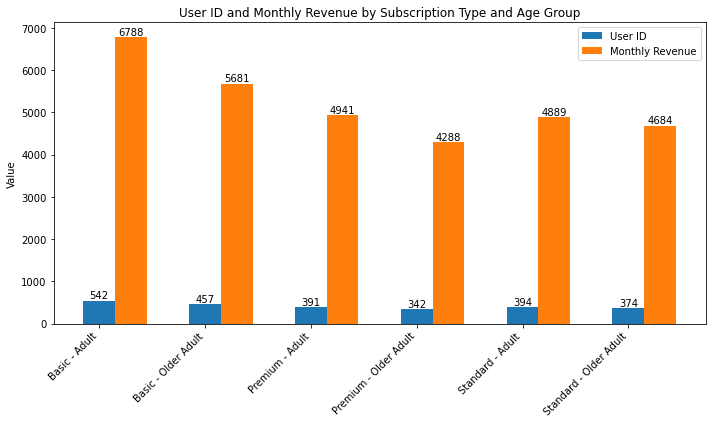

In [17]:
import matplotlib.pyplot as plt
# Assuming the data is stored in a DataFrame named 'df'

subscription_types = sub_distribution['Subscription Type'].unique().tolist()
age_groups = sub_distribution['Age Group'].unique().tolist()


# Extract the vsub_distributionalues for 'User ID' and 'Monthly Revenue'
user_ids = sub_distribution['User ID'].values
monthly_revenues = sub_distribution['Monthly Revenue'].values

# Create the bar plot
fig, ax = plt.subplots(figsize=(10, 6))
x = range(len(sub_distribution))
width = 0.3

# Determine the number of combinations
num_combinations = len(subscription_types) * len(age_groups)


# Set the x-axis tick labels
tick_labels = []
for sub_type in subscription_types:
    for age_group in age_groups:
        tick_labels.append('{} - {}'.format(sub_type, age_group))
# Plot User ID
user_id_bars = ax.bar(x, user_ids, width, label='User ID')
# Plot Monthly Revenue
revenue_bars=ax.bar([i + width for i in x], monthly_revenues, width, label='Monthly Revenue')
ax.set_xticks(x)
ax.set_xticklabels(tick_labels, rotation=45, ha='right')


# Add labels to the top of the bars
for bar in user_id_bars + revenue_bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, height, ha='center', va='bottom')




# Set the y-axis label
ax.set_ylabel('Value')

# Set the chart title and legend
ax.set_title('User ID and Monthly Revenue by Subscription Type and Age Group')

ax.legend()

# Show the plot
plt.tight_layout()
plt.show()


# How does the monthly revenue generated from subscriptions vary across different subscription types?

In [18]:
revenue_distribution = netflix_df.groupby(['Subscription Type']).agg({'Monthly Revenue': 'sum'})
revenue_distribution=revenue_distribution.reset_index()
revenue_distribution

,Subscription Type,Monthly Revenue
0,Basic,12469
1,Premium,9229
2,Standard,9573


In [19]:
subscription_types = revenue_distribution['Subscription Type'].unique().tolist()
monthly_revenue = revenue_distribution['Monthly Revenue']

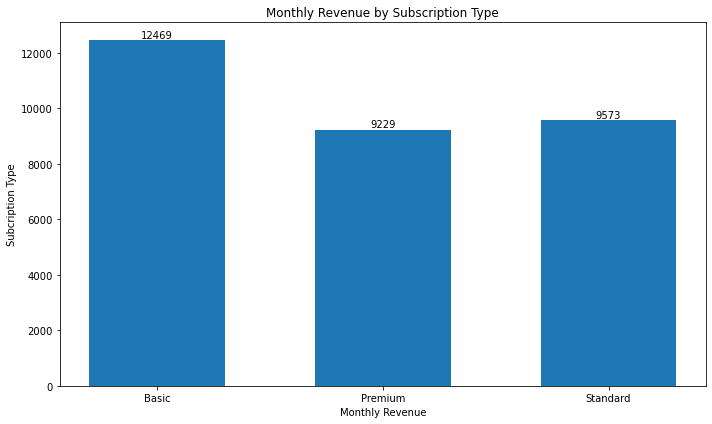

In [31]:
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(subscription_types, monthly_revenue, tick_label=subscription_types, width=0.6)

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, str(height), ha='center', va='bottom')

plt.xlabel('Monthly Revenue')
plt.ylabel('Subcription Type')
plt.title('Monthly Revenue by Subscription Type')
plt.tight_layout()
plt.show()

# What is the average duration between a user joining Netflix and making their last payment?

In [34]:
netflix_df['Duration']=netflix_df['Last Payment Date'].sub(netflix_df['Join Date'],axis=0)

In [43]:
str(netflix_df['Duration'].describe()['mean'])

'326 days 02:26:52.800000'

# Are there any correlations between the user's device type and their subscription type?

The chi-square test is used to determine if there is a significant association between two categorical variables. It compares the observed frequencies in a contingency table to the expected frequencies under the assumption of independence.

In [50]:
from scipy.stats import chi2_contingency

In [76]:
correlation_df = netflix_df.groupby(['Subscription Type','Device']).size().unstack(fill_value=0)
correlation_df.reset_index(inplace=True)
correlation_df

Device,Subscription Type,Laptop,Smart TV,Smartphone,Tablet
0,Basic,259,238,251,251
1,Premium,192,188,171,182
2,Standard,185,184,199,200


In [84]:
cols =['Laptop','Smart TV','Smartphone','Tablet']
contingency_table = correlation_df[cols].values.tolist()

In [85]:
# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2)
print("p-value:", p)

Chi-square statistic: 2.7771773735944496
p-value: 0.8362486599023569


The p-value of 0.8362486599023569 is much higher than the significance level of 0.05. This means that the observed association between device type and subscription type is not statistically significant at the 0.05 level. In other words, the data does not provide strong evidence to conclude that there is a significant association between these variables.

# Which country has the highest number of Netflix users in the dataset

In [102]:
highest_users_country_df = netflix_df.groupby(['Country']).agg({'User ID':'nunique'})
highest_users_country_df.reset_index(inplace=True)
highest_users_country_df.rename(columns={'User ID':'Total Users'} ,inplace=True)
highest_users_country_df.sort_values(by='Total Users', ascending=False,inplace=True)

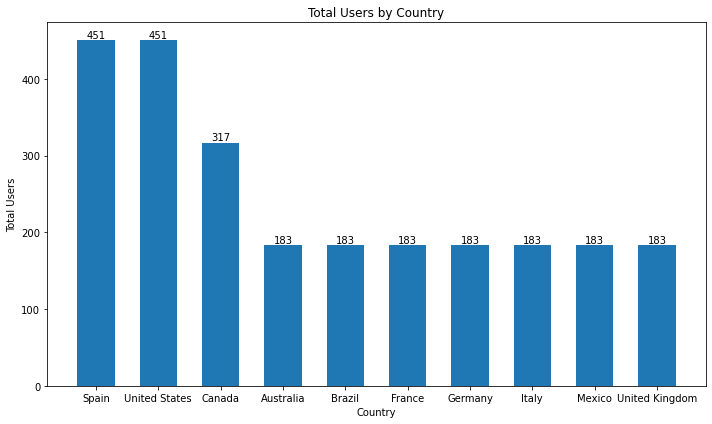

In [103]:
country_bars=highest_users_country_df['Country'].unique().tolist()
total_users_bars=highest_users_country_df['Total Users'].tolist()
fig, ax = plt.subplots(figsize=(10, 6))

bars=ax.bar(country_bars,total_users_bars,tick_label=country_bars, width=0.6)

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, str(height), ha='center', va='bottom')
plt.xlabel('Country')
plt.ylabel('Total Users')
plt.title('Total Users by Country')
plt.tight_layout()
plt.show()